# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [3]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:
The top two dimensions with highest standard deviation are Fresh(12647) and Grocery(9503). Since standard deviation is a measure of spread (variance), my expectation is that these two dimensions will be major components in the first two PCA dimensions.

The vectors showing up as ICA dimensions will be the non-overlapping items purchased by the customers. The vectors should represent item purchases (and customer profiles) that are independent from each other. 

These independent customer profiles (grocery stories, delicatessen, ...) can be used in two ways:

a) Target new services or products specific to a particular customer profile.

b) Ensure that customers from all distinct customer profiles are consulted before making major service changes.  

###PCA

PCA Components: 
[[ 0.97653685  0.12118407  0.06154039  0.15236462 -0.00705417  0.06810471]
 [ 0.11061386 -0.51580216 -0.76460638  0.01872345 -0.36535076 -0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [ 0.04187648  0.64564047 -0.37546049 -0.64629232 -0.14938013  0.02039579]
 [-0.015986   -0.20323566  0.1602915  -0.22018612 -0.20793016  0.91707659]
 [ 0.01576316 -0.03349187 -0.41093894  0.01328898  0.87128428  0.26541687]]
PCA Explained Variance Ratio: 
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


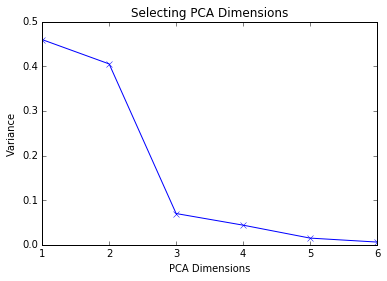

In [4]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print "PCA Components: \n{}" .format(pca.components_)
print "PCA Explained Variance Ratio: \n{}" .format(pca.explained_variance_ratio_)
x = np.array([1, 2, 3, 4, 5, 6])
plt.plot(x, pca.explained_variance_ratio_, 'bx-') 
plt.xlabel('PCA Dimensions') 
plt.ylabel('Variance') 
plt.title('Selecting PCA Dimensions') 
plt.show()

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 
Based on the 'explained variance ratio', we note that the first two dimensions represent about 46% and 41% of the variance respectively. The variance in the third dimension drops off to 7%.
Since the first two dimensions contain about 87% of the variance, two dimensions is a good cut off point.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The first dimension has a covariance of 98% with the 'Fresh' feature. So, the first dimension primarily represents this feature. It also includes some representation from 'Milk' (12%) and 'Frozen' (15%).

The second dimension has a covariance of -76%, -52% & -37% with 'Grocery', 'Milk' & 'Detergents_Paper' features. So, the second dimension is primarily a combination of these three features.

Other observations are as follows:

a) Correlated Purchases
* Purchase of the 'Fresh' items is fairly independent with a little overlap with 'Frozen' & 'Milk' items.
* Purchase of 'Grocery' items overlaps more with 'Milk' and 'Detergents_Paper'.

b) Customer Profiles
Items identified in the first two components represent the purchases that vary widely in the customer base. Customer profiles created with different purchase requirements of these two principal components can be used to gather feedback on future product/service changes.   


Reducing the number of dimensions addresses two issues:

a) Curse of Dimensionality
Higher dimensional data requires larger training sets, computational time & memory for machine learning algorithms to produce efficient and useful results. PCA is a useful technique to explore the possibility of dimension reduction. In this data set, we can now use the reduced dimensions for supervised learning algorithms and improve the quality of results. 

b) Visualization
Data with 2 or 3 dimensions lends itself to plots and visual analysis methods such as clustering. Using PCA, we have successfully reduced the data to two dimensions. We can now apply clustering methods and visualize the results in a 2D plot.

###ICA

In [160]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn.preprocessing import scale

ica = FastICA(n_components=6, whiten=True)
unmixing        = ica.fit_transform(data)
scaled_unmixing = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, ica.components_) 
print "ICA Components"
print np.around(ica.components_, 8)
print "Normalized ICA Components"
print np.around(scaled_unmixing, 3)

ICA Components
[[ -1.60000000e-07  -9.81000000e-06   5.92000000e-06   3.40000000e-07
   -3.63000000e-06   6.02000000e-06]
 [ -3.90000000e-07  -2.10000000e-07  -5.90000000e-07  -5.10000000e-07
    5.00000000e-07   1.80800000e-05]
 [ -8.60000000e-07  -1.50000000e-07   7.80000000e-07   1.11500000e-05
   -5.40000000e-07  -5.97000000e-06]
 [ -3.98000000e-06   8.90000000e-07   7.50000000e-07   6.70000000e-07
   -2.33000000e-06   9.70000000e-07]
 [  2.00000000e-07  -1.77000000e-06   7.21000000e-06   3.10000000e-07
   -2.62000000e-06  -1.83000000e-06]
 [ -2.70000000e-07   2.53000000e-06   1.15500000e-05  -1.49000000e-06
   -2.80400000e-05  -5.71000000e-06]]
Normalized ICA Components
[[-0.012 -0.73   0.44   0.025 -0.27   0.448]
 [-0.021 -0.012 -0.033 -0.028  0.028  0.998]
 [-0.068 -0.012  0.061  0.877 -0.042 -0.469]
 [-0.812  0.181  0.153  0.137 -0.476  0.198]
 [ 0.025 -0.219  0.891  0.038 -0.324 -0.226]
 [-0.009  0.082  0.373 -0.048 -0.905 -0.184]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 
In this dataset ICA is used to uncover non-overlapping items (item combinations) purchased by the customers. The vectors should represent item purchases (and customer profiles) that are independent from each other.

When interpreting the coefficients for a particular component, positive and negative signs indicate anti-correlation. If we have a component with a high positive coefficient and a very negative coefficient, it would be interpreted as one or another but not both. 

For example: 
Comparing ICA2 vs ICA3 shows that -
* ICA2 has a large positive coefficient for Deli(0.998). 
* ICA3 has a large positive coefficient for Frozen(0.877) and a negative coefficient for Deli(-0.469). 

Assume that we interpret ICA2 as a Delicatessen store and ICA3 as an Ice Cream store. The negative coefficent for Deli on ICA3 is an indication that the Ice Cream store does not have as much (or any) Deli products. 

The 6 independent customer purchase profiles are:
1. Cafe - Milk(0.73) is the primary purchase. Detergents_Paper(0.27) is a secondary purchase. Anti-correlation with rest of the categories.
2. Delicatessen store - Delicatessen(0.998) is the primary purchase. Negligible purchase of other categories.
3. Meat store / Ice Cream store - Frozen(0.877) is the primary purchase. Anti-correlation with Delicatessen. Negligible purchase of other categories.
4. Fruit store - Fresh(0.812) is the primary purchase. Detergents_Paper(0.476) is a secondary purchase. Anti-correlation with all other categories.
5. Grocery store - Grocery(0.891) is the primary purchase. Negligible or Anti-correlation with the rest of categories.
6. Hotel/Inn - Detergents_Paper(0.905) is the primary purchase. Delicatessen(0.184), Frozen(0.048) are secondary purchases.


These independent customer profiles (Cafe, delicatessen, ...) can be used in two ways:

a) Target new services or products specific to a particular customer profile.

b) Ensure that customers from all distinct customer profiles are consulted before making major service changes.

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 
K Means clustering performs a hard assignment to a cluster. GMM uses a soft assignment (probability value).
The other difference is that the K Means algorithm does not compute the covariance matrix. K means algorithm is expected to converge faster.

In this project, we are trying to create clusters of customers to interpret their buying habits. We need an algorithm that makes hard assignments - A customer as a whole should belong to one cluster (instead of being split across multiple clusters). K Means is a good choice for this reason.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [5]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [6]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca2 = PCA(n_components=2)
reduced_data = pca2.fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[   650.02212207  -1585.51909007]
 [ -4426.80497937  -4042.45150884]
 [ -4841.9987068   -2578.762176  ]
 [   990.34643689   6279.80599663]
 [ 10657.99873116   2159.72581518]
 [ -2765.96159271    959.87072713]
 [  -715.55089221   2013.00226567]
 [ -4474.58366697  -1429.49697204]
 [ -6712.09539718   2205.90915598]
 [ -4823.63435407 -13480.55920489]]


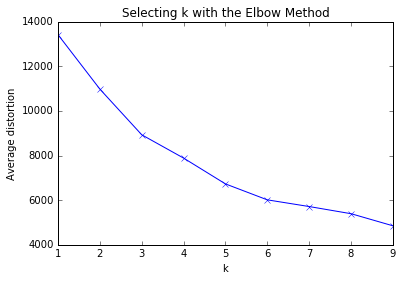

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [7]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

# Implement elbow method to determine n_clusters
from scipy.spatial.distance import cdist

K = range(1, 10) 
meandistortions = [] 
for k in K: 
     kmeans = KMeans(n_clusters=k) 
     kmeans.fit(reduced_data) 
     meandistortions.append(sum(np.min(cdist(reduced_data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / reduced_data.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 
plt.show()

# Derived n_clusters=6 from Elbow Plot 
clusters = KMeans(n_clusters=6)
clusters.fit(reduced_data)
print clusters

In [8]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

Centroids transformed back to original space:
[[  6593.  17980.  26341.   2193.  11770.   2721.]
 [  6737.   2123.   3220.   2259.    841.    788.]
 [ 21649.   4522.   4958.   4584.   1110.   1895.]
 [ 49427.   7535.   6075.   8920.    610.   3779.]
 [ 24861.  43834.  61861.   4978.  27877.   6881.]
 [  4278.   8251.  12438.   1858.   5287.   1404.]]
Scaled Centroids in original space:
[[ 0.18944  0.5166   0.75683  0.063    0.33818  0.07817]
 [ 0.82495  0.26001  0.39424  0.27662  0.10293  0.09653]
 [ 0.93202  0.19467  0.21344  0.19736  0.04779  0.0816 ]
 [ 0.96363  0.14689  0.11844  0.17389  0.0119   0.07368]
 [ 0.29267  0.51603  0.72826  0.0586   0.32818  0.081  ]
 [ 0.25825  0.49805  0.75077  0.11213  0.31913  0.08475]]


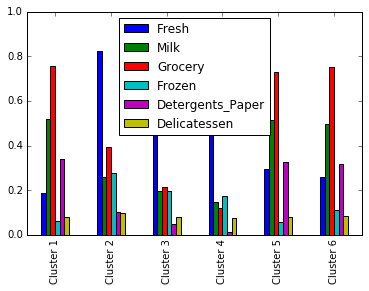

In [9]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.cluster_centers_
centroids_inv = pca2.inverse_transform(centroids)
print "Centroids transformed back to original space:"
print np.around(centroids_inv, 0)

print "Scaled Centroids in original space:"
scaled_centroids_inv = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, centroids_inv) 
print np.around(scaled_centroids_inv, 5)
pd.DataFrame(scaled_centroids_inv, columns = data.columns, index = ["Cluster {}".format(i) for i in range(1, 7)]).plot(kind = 'bar')

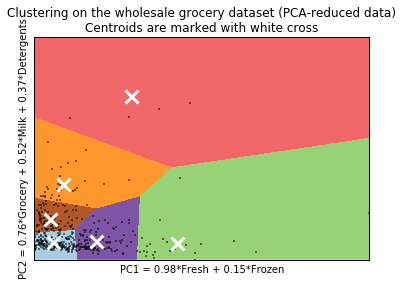

In [162]:

pd.DataFrame(scaled_centroids_inv, columns = data.columns, index = ["Cluster {}".format(i) for i in range(1, 7)]).plot(kind = 'bar')# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlabel('PC1 = 0.98*Fresh + 0.15*Frozen') 
plt.ylabel('PC2 = 0.76*Grocery + 0.52*Milk + 0.37*Detergents')
plt.xlim(x_min, x_max)
# Invert y-axis so that bottom left is the origin
plt.ylim(y_max, y_min)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: Each cluster can be treated as a category of customers. The customer(s) closest to the central object of each cluster (centroid) is a 'representative customer' for that category. The feedback from these 'representative customers' can be used to set an expectation for the category represented by them.

The cluster visualization can be used to categorize customers as follows:

1. Purchase Size: Clusters closest to the bottom left represent smaller customers and clusters closest to the top right represent the larger customers.

2. Purchase Categories: Cluster location can be used to interpret relative amount of purchased products. For example: Clusters closest to the PC1 axis purchase lesser amount of Grocery, Milk & Detergents than those clusters that are further away.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 
ICA resulted in identifying and labeling customer profiles that were distinct from each other. However, this method did not focus on reducing the number of dimensions for visualization purposes. This left the data in the original 6 dimensions which does not lend itself to easy visualization. The labeling of customer profiles required some imagination and may not be completely reliable. 

PCA along with clustering allowed for a clear visualization of all the customers in a 2D plot. The centroid calculations were useful to identify 'representative customers' that could be used to set the expectation of other customers in their category.

The PCA + clustering technique gives me more confidence in understanding the range of customers being served. The identification of 'representative customers' in each category provides a simpler way to poll the customer base and receive feedback.

**9)** How would you use that technique to help the company design new experiments?

Answer: A/B testing is a methodology that can be used to design experiments to receive feedback before rolling out service/product changes to the entire customer base.

In this method two variations (example: old & new) of the service/product are  provided. We can then compare how customers within the same category (cluster) react to each variant. If the customer base has been properly categorized (clustered), this method may help identify unique requirements of each customer category. The business can then make service/product changes to target each category accordingly. 

Example: 
Assume that the wholesale distributor would like to guage the demand for a new product - Let's say organic produce or meat products from a new company. We can foresee that premium grocery stores & delis are likely to generate higher demand for such products. Large volume discount stores may not have the same level of demand because of the higher product price. 

Properly categorized customer profiles will help target and interpret results from A/B experiments. 

**10)** How would you use that data to help you predict future customer needs?

Answer: PCA allowed the data to be reduced from 6 dimensions to 2 while retaining 87% of the variance. For future supervised learning analysis, we have the option of using these 2 reduced dimensions as features.

While selecting a training set, care should be taken to have adequate & balanced representation from each category (cluster).